<a href="https://colab.research.google.com/github/ecrinyetim/regression/blob/main/regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("saurabhshahane/seoul-bike-sharing-demand-prediction")

print("Path to dataset files:", path)
file_path = os.path.join(path, "SeoulBikeData.csv")

#Standart utf-8 şeklinde kaydedilmediği için ISO-8859-1 kullandım
df = pd.read_csv(file_path, encoding='ISO-8859-1')


100%|██████████| 126k/126k [00:00<00:00, 27.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction/versions/1


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,30/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [ ]:
print(df.nunique())

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


In [ ]:
# Tarihi datetime formatına çevir (Gün/Ay/Yıl formatında olduğu görülüyor)
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Yeni özellikler türetelim
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.dayofweek  # 0: Pazartesi, 6: Pazar

# Orijinal Date sütunu artık gereksiz, silelim
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int32

In [ ]:
df.columns = [
    'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
    'Wind_speed', 'Visibility', 'Dew_point_temp', 'Solar_Radiation',
    'Rainfall', 'Snowfall', 'Seasons', 'Holiday',
    'Functioning_Day', 'Month', 'Year', 'Weekday'
]
print("Sütun isimleri güncellendi.")

Sütun isimleri güncellendi.


In [ ]:
X = df.drop(["Rented_Bike_Count",], axis=1)
y = df["Rented_Bike_Count"]

sayisal_features = X.select_dtypes(include=["int64", "float64","int32"]).columns
kategorik_features = X.select_dtypes(include=['object']).columns

print("Sayısal Sütunlar:", list(sayisal_features))
print("Kategorik Sütunlar:", list(kategorik_features))

Sayısal Sütunlar: ['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month', 'Year', 'Weekday']
Kategorik Sütunlar: ['Seasons', 'Holiday', 'Functioning_Day']


In [ ]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

print(f"Toplam veri: {len(df)}")
print(f"Train seti: {len(X_train)}  (%60)")
print(f"Val seti:   {len(X_val)}    (%20)")
print(f"Test seti:  {len(X_test)}   (%20)")

Toplam veri: 8760
Train seti: 5256  (%60)
Val seti:   1752    (%20)
Test seti:  1752   (%20)


In [ ]:
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

for c in sayisal_features:
    print(c, detect_outliers(X_train[c]))

Hour 0
Temperature 0
Humidity 0
Wind_speed 113
Visibility 0
Dew_point_temp 0
Solar_Radiation 424
Rainfall 327
Snowfall 270
Month 0
Year 438
Weekday 0


----------------------------------------
--- BASKILAMA ÖNCESİ İSTATİSTİKLER ---
Wind_speed      -> Min: 0.0000 | Max: 7.4000
Solar_Radiation -> Min: 0.0000 | Max: 3.5200
----------------------------------------

...Baskılama işlemi yapılıyor...

>> Wind_speed için Sınırlar -> Alt: -0.9500 | Üst: 4.2500
>> Solar_Radiation için Sınırlar -> Alt: -1.3650 | Üst: 2.2750
----------------------------------------
--- BASKILAMA SONRASI İSTATİSTİKLER ---
Wind_speed      -> Min: 0.0000 | Max: 4.2500
Solar_Radiation -> Min: 0.0000 | Max: 2.2750
----------------------------------------


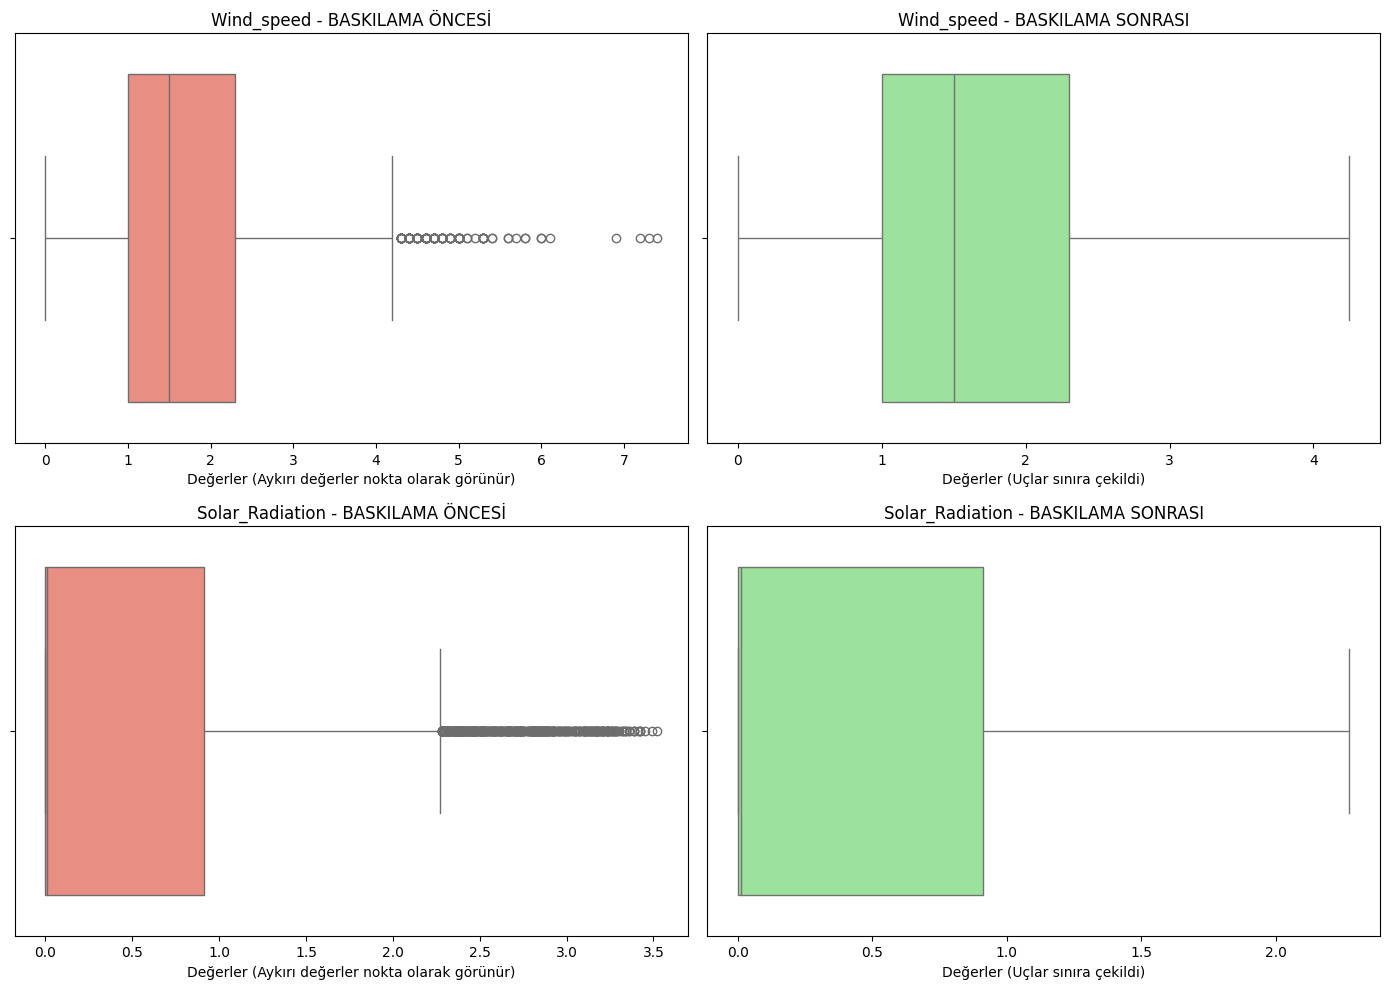

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. ADIM: Baskılama Kodu (Geliştirilmiş Versiyon)
baskilanacak_features = ['Wind_speed', 'Solar_Radiation']

# Görselleştirme ve kıyaslama yapabilmek için X_train'in eski halini kopyalayalım
X_train_before = X_train.copy()

def cap_outliers_final(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Sınır değerlerini yazdıralım (Bilgi amaçlı)
    print(f">> {col_name} için Sınırlar -> Alt: {lower:.4f} | Üst: {upper:.4f}")

    # Kopyası üzerinde işlem yap
    df_capped = df.copy()
    df_capped.loc[df_capped[col_name] > upper, col_name] = upper
    df_capped.loc[df_capped[col_name] < lower, col_name] = lower
    return df_capped

print("-" * 40)
print("--- BASKILAMA ÖNCESİ İSTATİSTİKLER ---")
for col in baskilanacak_features:
    print(f"{col:<15} -> Min: {X_train[col].min():.4f} | Max: {X_train[col].max():.4f}")
print("-" * 40)

# İşlemi Uygula
print("\n...Baskılama işlemi yapılıyor...\n")
for col in baskilanacak_features:
    X_train = cap_outliers_final(X_train, col)

print("-" * 40)
print("--- BASKILAMA SONRASI İSTATİSTİKLER ---")
for col in baskilanacak_features:
    print(f"{col:<15} -> Min: {X_train[col].min():.4f} | Max: {X_train[col].max():.4f}")
print("-" * 40)

# --- GÖRSELLEŞTİRME KISMI ---
# Her özellik için yan yana 2 grafik (Önce vs Sonra)
fig, axes = plt.subplots(nrows=len(baskilanacak_features), ncols=2, figsize=(14, 5 * len(baskilanacak_features)))

for i, col in enumerate(baskilanacak_features):
    # 1. Grafik: İşlemden ÖNCE (Kırmızımsı)
    sns.boxplot(x=X_train_before[col], ax=axes[i, 0], color='salmon')
    axes[i, 0].set_title(f"{col} - BASKILAMA ÖNCESİ")
    axes[i, 0].set_xlabel("Değerler (Aykırı değerler nokta olarak görünür)")

    # 2. Grafik: İşlemden SONRA (Yeşilimsi)
    sns.boxplot(x=X_train[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"{col} - BASKILAMA SONRASI")
    axes[i, 1].set_xlabel("Değerler (Uçlar sınıra çekildi)")

plt.tight_layout()
plt.show()


--- 1. ADIM: Verinin İlk Hali (Örnek 5 Satır) ---
     Seasons     Holiday Functioning_Day
8036  Autumn  No Holiday             Yes
4711  Summer  No Holiday             Yes
6547  Summer  No Holiday             Yes
887   Winter  No Holiday             Yes
1621  Winter  No Holiday             Yes

--- 2. ADIM: Binary Mapping Sonrası ---
Holiday: 'No Holiday' -> 0, 'Holiday' -> 1
Functioning_Day: 'No' -> 0, 'Yes' -> 1
----------------------------------------
     Holiday (Eski)  Holiday (Yeni) Func_Day (Eski)  Func_Day (Yeni)
8036     No Holiday               0             Yes                1
4711     No Holiday               0             Yes                1
6547     No Holiday               0             Yes                1
887      No Holiday               0             Yes                1
1621     No Holiday               0             Yes                1

--- 3. ADIM: One-Hot Encoding Sonrası (Seasons) ---
Seasons sütunu silindi, yerine yeni sütunlar geldi:
      Seasons_Spring

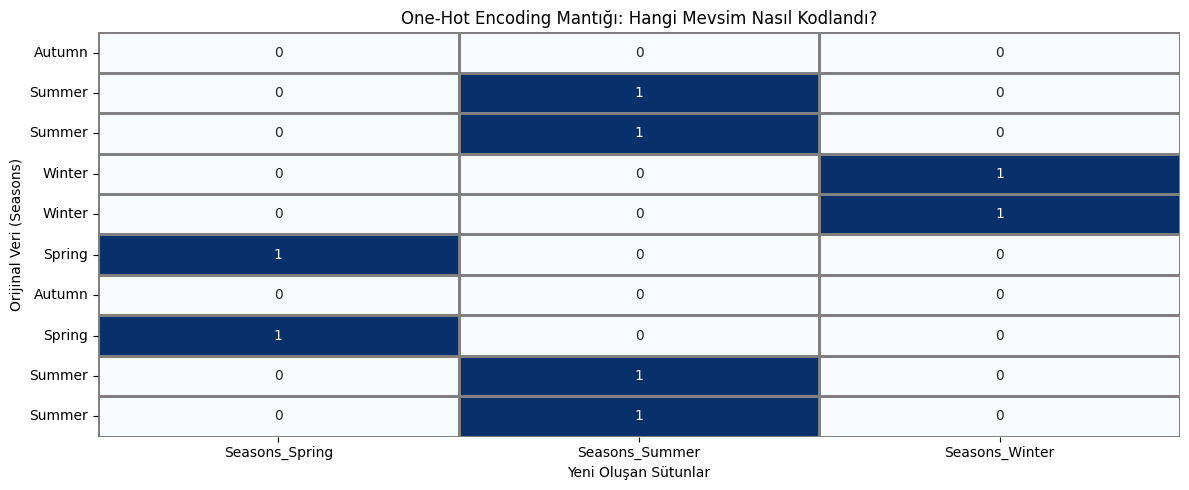


Özet: drop='first' kullandığımız için 'Spring' (veya alfabetik ilk) sütunu oluşmadı.
Eğer hepsi 0 ise, o satır düşürülen mevsimdir (Referans Kategori).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# --- HAZIRLIK (Öncesi/Sonrası kıyaslaması için kopyasını alıyoruz) ---
print("\n--- 1. ADIM: Verinin İlk Hali (Örnek 5 Satır) ---")
# İşlem öncesi halini saklayalım ki kıyaslayabilelim
X_train_raw = X_train.copy()
print(X_train_raw[['Seasons', 'Holiday', 'Functioning_Day']].head())


# --- İŞLEM 1: Binary Mapping (Elle Haritalama) ---
binary_map = {'No Holiday': 0, 'Holiday': 1, 'Yes': 1, 'No': 0}

# Her üç set için de uyguluyoruz
for df in [X_train, X_val, X_test]:
    df['Holiday'] = df['Holiday'].map(binary_map)
    df['Functioning_Day'] = df['Functioning_Day'].map(binary_map)

print("\n--- 2. ADIM: Binary Mapping Sonrası ---")
print("Holiday: 'No Holiday' -> 0, 'Holiday' -> 1")
print("Functioning_Day: 'No' -> 0, 'Yes' -> 1")
print("-" * 40)
# Kıyaslama Tablosu
comparison_binary = pd.DataFrame({
    'Holiday (Eski)': X_train_raw['Holiday'],
    'Holiday (Yeni)': X_train['Holiday'],
    'Func_Day (Eski)': X_train_raw['Functioning_Day'],
    'Func_Day (Yeni)': X_train['Functioning_Day']
})
print(comparison_binary.head())


# --- İŞLEM 2: OneHotEncoder (Mevsimler) ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Encoder'ı sadece Train setine göre eğit (fit)
ohe.fit(X_train[['Seasons']])

# Dönüştürme Fonksiyonu
def encode_seasons(df, encoder):
    seasons_encoded = encoder.transform(df[['Seasons']])
    seasons_df = pd.DataFrame(seasons_encoded, columns=encoder.get_feature_names_out(['Seasons']), index=df.index)
    df = pd.concat([df, seasons_df], axis=1)
    df.drop('Seasons', axis=1, inplace=True)
    return df

# Tüm setlere uygula
X_train = encode_seasons(X_train, ohe)
X_val = encode_seasons(X_val, ohe)
X_test = encode_seasons(X_test, ohe)

print("\n--- 3. ADIM: One-Hot Encoding Sonrası (Seasons) ---")
print("Seasons sütunu silindi, yerine yeni sütunlar geldi:")
print(X_train.filter(like='Seasons').head()) # Sadece içinde 'Seasons' geçen yeni sütunları gösterir

# --- GÖRSELLEŞTİRME ---
# Seasons dönüşümünü anlamak için bir heatmap (ısı haritası) çizelim
plt.figure(figsize=(12, 5))

# İlk 10 veriyi alalım
sample_indices = X_train.head(10).index
original_seasons = X_train_raw.loc[sample_indices, 'Seasons']
encoded_seasons = X_train.loc[sample_indices].filter(like='Seasons')

# Görselleştirme için yan yana koyalım
viz_data = encoded_seasons.copy()
viz_data['ORİJİNAL (Seasons)'] = original_seasons # Orijinal ismi de ekleyelim

# Heatmap çizimi (Sadece 0 ve 1'leri boyayalım)
sns.heatmap(encoded_seasons, annot=True, cmap="Blues", cbar=False, linewidths=1, linecolor='gray')
plt.title("One-Hot Encoding Mantığı: Hangi Mevsim Nasıl Kodlandı?")
plt.yticks(ticks=[i + 0.5 for i in range(10)], labels=original_seasons.values, rotation=0)
plt.xlabel("Yeni Oluşan Sütunlar")
plt.ylabel("Orijinal Veri (Seasons)")

print("\nGrafik oluşturuluyor...")
plt.tight_layout()
plt.show()

print("\nÖzet: drop='first' kullandığımız için 'Spring' (veya alfabetik ilk) sütunu oluşmadı.")
print("Eğer hepsi 0 ise, o satır düşürülen mevsimdir (Referans Kategori).")


--- ÖLÇEKLEME ÖNCESİ İSTATİSTİKLER (İlk 3 Sütun) ---
       Hour  Temperature  Humidity
mean  11.56        12.89     58.26
std    6.94        11.89     20.44
min    0.00       -17.80      0.00
max   23.00        39.30     98.00

--- ÖLÇEKLEME SONRASI İSTATİSTİKLER (İlk 3 Sütun) ---
      Hour  Temperature  Humidity
mean  0.00        -0.00     -0.00
std   1.00         1.00      1.00
min  -1.67        -2.58     -2.85
max   1.65         2.22      1.94
(Not: Ortalama 0.00'a, Standart Sapma 1.00'e yaklaşmalı)


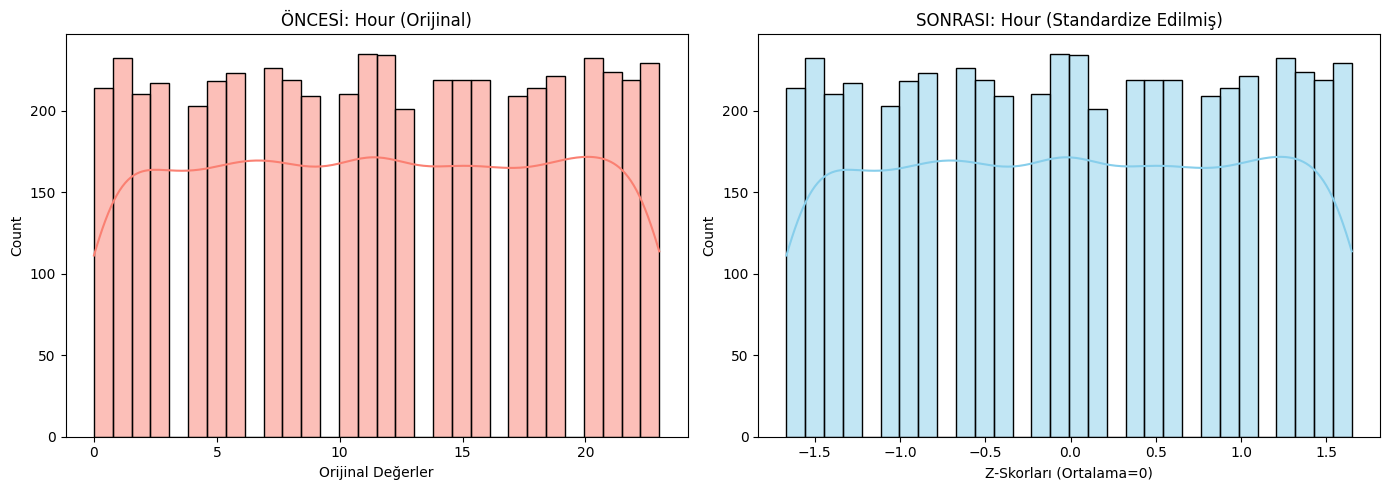


Ölçekleme Tamamlandı.
          Hour  Temperature  Humidity  Wind_speed  Visibility  Dew_point_temp  \
8036  1.216301    -0.445003  0.036273   -1.022939    0.921319       -0.314009   
4711 -0.656838     0.446802  0.819030   -0.318271    0.921319        0.732907   
6547  1.072214     1.027317  0.770107    0.386397   -0.545814        1.233271   
887   1.648564    -1.353635 -0.404028   -0.922272   -0.014695       -1.245456   
1621  0.207688    -1.715405 -1.480318    2.550736    0.763951       -2.076831   

      Solar_Radiation  Rainfall  Snowfall   Holiday  Functioning_Day  \
8036        -0.681037 -0.136142  -0.17173 -0.231339         0.189391   
4711         0.039571 -0.136142  -0.17173 -0.231339         0.189391   
6547        -0.681037  0.346889  -0.17173 -0.231339         0.189391   
887         -0.681037 -0.136142  -0.17173 -0.231339         0.189391   
1621         2.246433 -0.136142  -0.17173 -0.231339         0.189391   

         Month      Year   Weekday  Seasons_Spring  Seaso

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- 1. ADIM: ÖNCESİ ANALİZİ ---
print("\n--- ÖLÇEKLEME ÖNCESİ İSTATİSTİKLER (İlk 3 Sütun) ---")
# İlk 3 sayısal sütunun ortalama ve standart sapmasına bakalım
# (Burada sayısal olmayan sütunlar varsa hata vermemesi için select_dtypes kullanabiliriz,
# ama verin zaten encode edildiği için hepsi sayısaldır diye varsayıyoruz.)
print(X_train.iloc[:, :3].agg(['mean', 'std', 'min', 'max']).round(2))

# --- 2. ADIM: SCALER İŞLEMİ (Senin Kodun) ---
scaler = StandardScaler()

# Scaler'ı sadece X_train'e göre ayarla (fit) - Veri sızıntısını önlemek için kural budur.
scaler.fit(X_train)

# Sütun isimlerini kaybetmemek için DataFrame olarak dönüştürüyoruz
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# --- 3. ADIM: SONRASI ANALİZİ ---
print("\n--- ÖLÇEKLEME SONRASI İSTATİSTİKLER (İlk 3 Sütun) ---")
print(X_train_scaled.iloc[:, :3].agg(['mean', 'std', 'min', 'max']).round(2))
print("(Not: Ortalama 0.00'a, Standart Sapma 1.00'e yaklaşmalı)")

# --- 4. ADIM: GÖRSELLEŞTİRME (Farkı Görelim) ---
# Görselleştirmek için rastgele bir sütun seçelim (örneğin ilk sütun)
col_to_plot = X_train.columns[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol Grafik: Ölçekleme ÖNCESİ
sns.histplot(X_train[col_to_plot], kde=True, ax=axes[0], color='salmon', bins=30)
axes[0].set_title(f"ÖNCESİ: {col_to_plot} (Orijinal)")
axes[0].set_xlabel("Orijinal Değerler")

# Sağ Grafik: Ölçekleme SONRASI
sns.histplot(X_train_scaled[col_to_plot], kde=True, ax=axes[1], color='skyblue', bins=30)
axes[1].set_title(f"SONRASI: {col_to_plot} (Standardize Edilmiş)")
axes[1].set_xlabel("Z-Skorları (Ortalama=0)")

plt.tight_layout()
plt.show()

print("\nÖlçekleme Tamamlandı.")
print(X_train_scaled.head())

Linear Regression eğitiliyor...
LINEAR REGRESSION SONUÇLARI
----------------------------------------
R2 Score (Başarı Oranı) : 0.5481
MAE (Ortalama Hata)     : 322.62
RMSE (Karekök Hata)     : 428.85
----------------------------------------


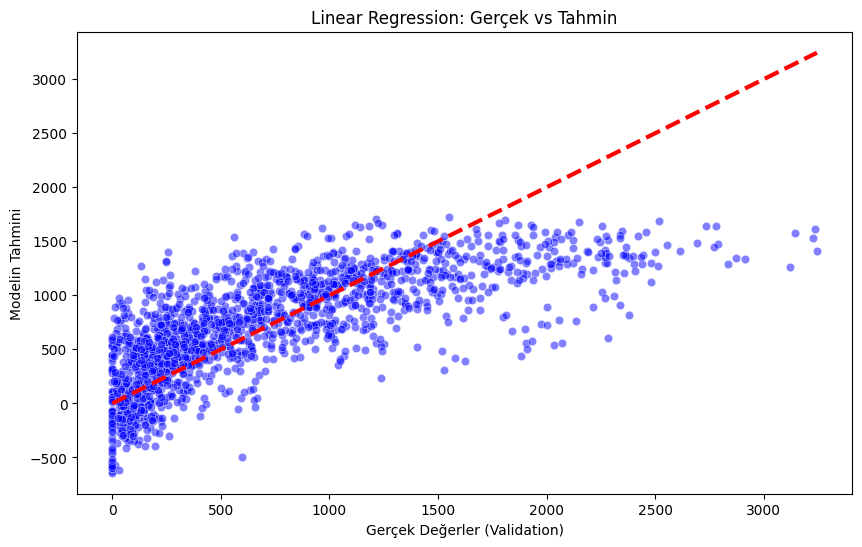

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lr_model = LinearRegression()

print("Linear Regression eğitiliyor...")
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_val_scaled)

# 4. Başarıyı Ölçümle
mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2_lr = r2_score(y_val, y_pred_lr)


print("LINEAR REGRESSION SONUÇLARI")
print("-" * 40)
print(f"R2 Score (Başarı Oranı) : {r2_lr:.4f}")
print(f"MAE (Ortalama Hata)     : {mae_lr:.2f}")
print(f"RMSE (Karekök Hata)     : {rmse_lr:.2f}")
print("-" * 40)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred_lr, alpha=0.5, color='blue')

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)
plt.xlabel("Gerçek Değerler (Validation)")
plt.ylabel("Modelin Tahmini")
plt.title("Linear Regression: Gerçek vs Tahmin")
plt.show()

Random Forest modeli eğitiliyor... (Bu işlem 10-20 saniye sürebilir)
----------------------------------------
 RANDOM FOREST SONUÇLARI
----------------------------------------
R2 Score (Başarı %): 0.9251
MAE (Ortalama Hata): 101.27
RMSE (Karekök Hata): 174.62
----------------------------------------


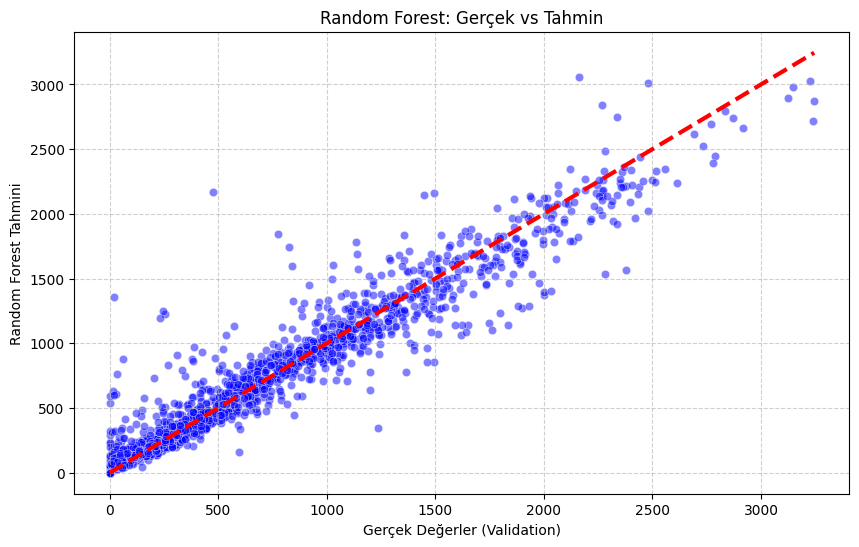

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

print("Random Forest modeli eğitiliyor... (Bu işlem 10-20 saniye sürebilir)")
# Modeli SADECE Train setiyle eğitiyoruz (Ölçeklenmiş verilerle)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_val_scaled)

r2_rf = r2_score(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print("-" * 40)
print(f" RANDOM FOREST SONUÇLARI")
print("-" * 40)
print(f"R2 Score (Başarı %): {r2_rf:.4f}")
print(f"MAE (Ortalama Hata): {mae_rf:.2f}")
print(f"RMSE (Karekök Hata): {rmse_rf:.2f}")
print("-" * 40)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.5, color='blue')


plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)

plt.xlabel("Gerçek Değerler (Validation)")
plt.ylabel("Random Forest Tahmini")
plt.title("Random Forest: Gerçek vs Tahmin")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

🚀 XGBoost modeli eğitiliyor... (Hızlıdır!)
----------------------------------------
 XGBOOST SONUÇLARI
----------------------------------------
R2 Score (Başarı %): 0.9413
MAE (Ortalama Hata): 91.51
RMSE (Karekök Hata): 154.56
----------------------------------------


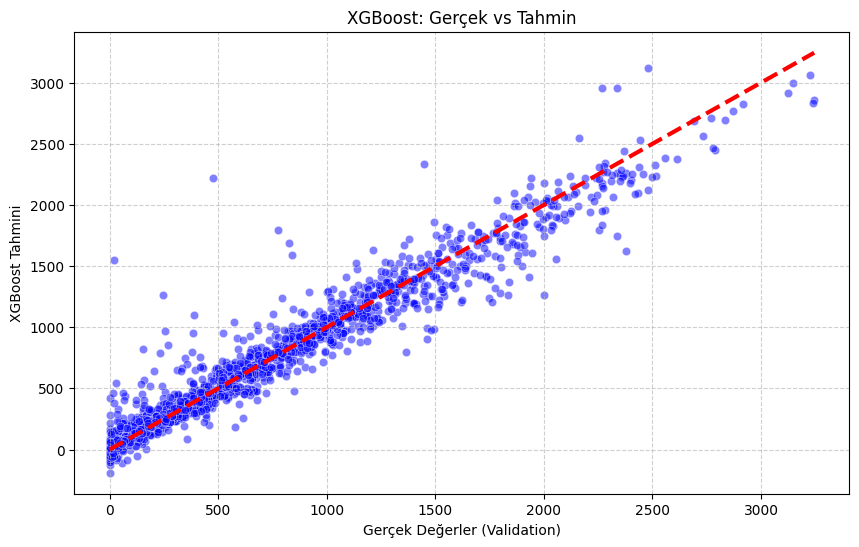

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)

print("🚀 XGBoost modeli eğitiliyor... (Hızlıdır!)")
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_val_scaled)

r2_xgb = r2_score(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

print("-" * 40)
print(f" XGBOOST SONUÇLARI")
print("-" * 40)
print(f"R2 Score (Başarı %): {r2_xgb:.4f}")
print(f"MAE (Ortalama Hata): {mae_xgb:.2f}")
print(f"RMSE (Karekök Hata): {rmse_xgb:.2f}")
print("-" * 40)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_val, y=y_pred_xgb, alpha=0.5, color='blue')

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=3)

plt.xlabel("Gerçek Değerler (Validation)")
plt.ylabel("XGBoost Tahmini")
plt.title("XGBoost: Gerçek vs Tahmin")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-3917200320.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=lr_df, ax=axes[0], palette=colors)
/tmp/ipython-input-3917200320.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=rf_df, ax=axes[1], palette='viridis')
/tmp/ipython-input-3917200320.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=xgb_df, ax=axes[2], palette='magma')


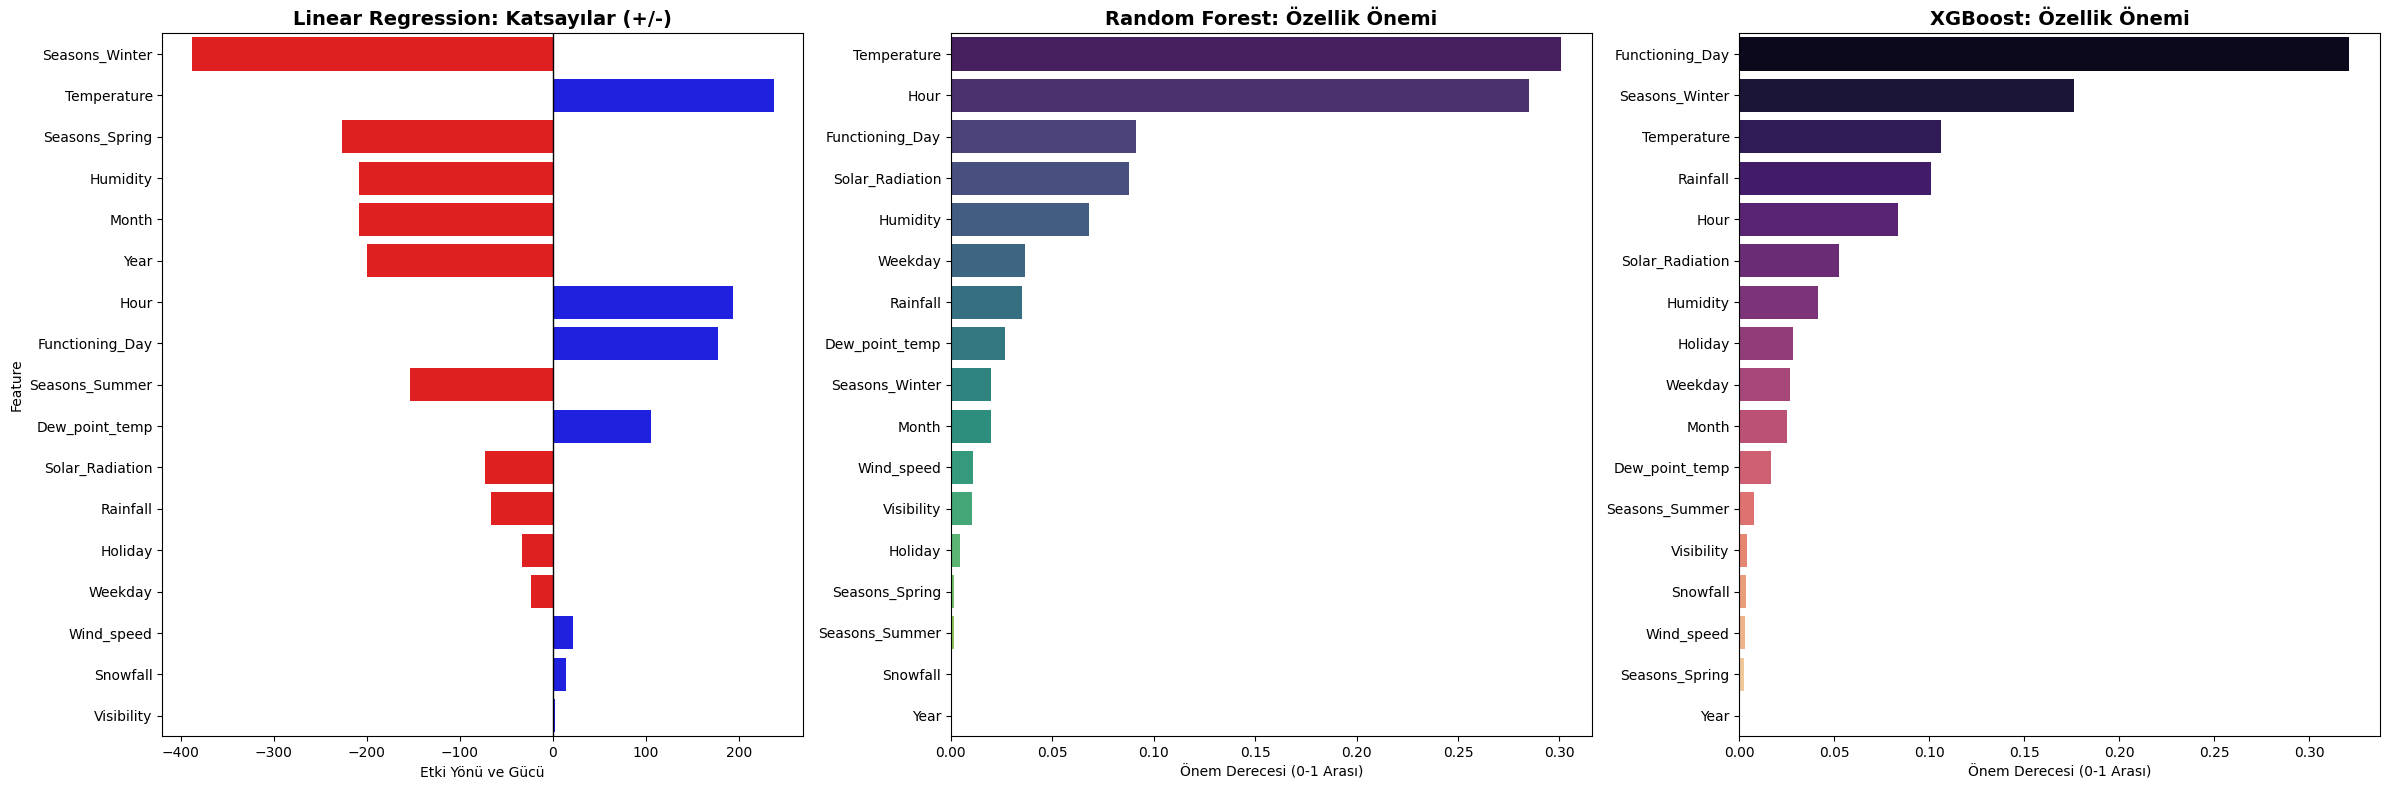

Model                | 1. En Önemli         | 2. En Önemli         | 3. En Önemli        
------------------------------------------------------------------------------------------
Linear Regression    | Seasons_Winter       | Temperature          | Seasons_Spring      
Random Forest        | Temperature          | Hour                 | Functioning_Day     
XGBoost              | Functioning_Day      | Seasons_Winter       | Temperature         


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik İsimleri
feature_names = X_train_scaled.columns

# ---------------------------------------------------------
# 1. VERİLERİN HAZIRLANMASI
# ---------------------------------------------------------

# A) Linear Regression (Katsayılar)
lr_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': lr_model.coef_
})
# Mutlak değere göre sırala (Grafikte büyük çubuklar üstte olsun diye)
lr_df['Abs_Score'] = lr_df['Score'].abs()
lr_df = lr_df.sort_values(by='Abs_Score', ascending=False)

# B) Random Forest (Önem Derecesi)
rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': rf_model.feature_importances_
}).sort_values(by='Score', ascending=False)

# C) XGBoost (Önem Derecesi)
xgb_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': xgb_model.feature_importances_
}).sort_values(by='Score', ascending=False)

# ---------------------------------------------------------
# 2. GÖRSELLEŞTİRME (3 GRAFİK YAN YANA)
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# --- GRAFİK 1: Linear Regression ---
# Renk Kodu: Pozitifler Mavi, Negatifler Kırmızı
colors = ['blue' if x > 0 else 'red' for x in lr_df['Score']]
sns.barplot(x='Score', y='Feature', data=lr_df, ax=axes[0], palette=colors)
axes[0].set_title('Linear Regression: Katsayılar (+/-)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Etki Yönü ve Gücü')
axes[0].axvline(0, color='black', linewidth=1) # Sıfır çizgisi

# --- GRAFİK 2: Random Forest ---
sns.barplot(x='Score', y='Feature', data=rf_df, ax=axes[1], palette='viridis')
axes[1].set_title('Random Forest: Özellik Önemi', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Önem Derecesi (0-1 Arası)')
axes[1].set_ylabel('') # Y ekseni tekrar etmesin

# --- GRAFİK 3: XGBoost ---
sns.barplot(x='Score', y='Feature', data=xgb_df, ax=axes[2], palette='magma')
axes[2].set_title('XGBoost: Özellik Önemi', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Önem Derecesi (0-1 Arası)')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3. YAZILI ÖZET (İLK 3 ÖZELLİK)
# ---------------------------------------------------------
print(f"{'Model':<20} | {'1. En Önemli':<20} | {'2. En Önemli':<20} | {'3. En Önemli':<20}")
print("-" * 90)
print(f"{'Linear Regression':<20} | {lr_df.iloc[0]['Feature']:<20} | {lr_df.iloc[1]['Feature']:<20} | {lr_df.iloc[2]['Feature']:<20}")
print(f"{'Random Forest':<20} | {rf_df.iloc[0]['Feature']:<20} | {rf_df.iloc[1]['Feature']:<20} | {rf_df.iloc[2]['Feature']:<20}")
print(f"{'XGBoost':<20} | {xgb_df.iloc[0]['Feature']:<20} | {xgb_df.iloc[1]['Feature']:<20} | {xgb_df.iloc[2]['Feature']:<20}")

1/3: Linear Regression optimize ediliyor (Ridge ile)...


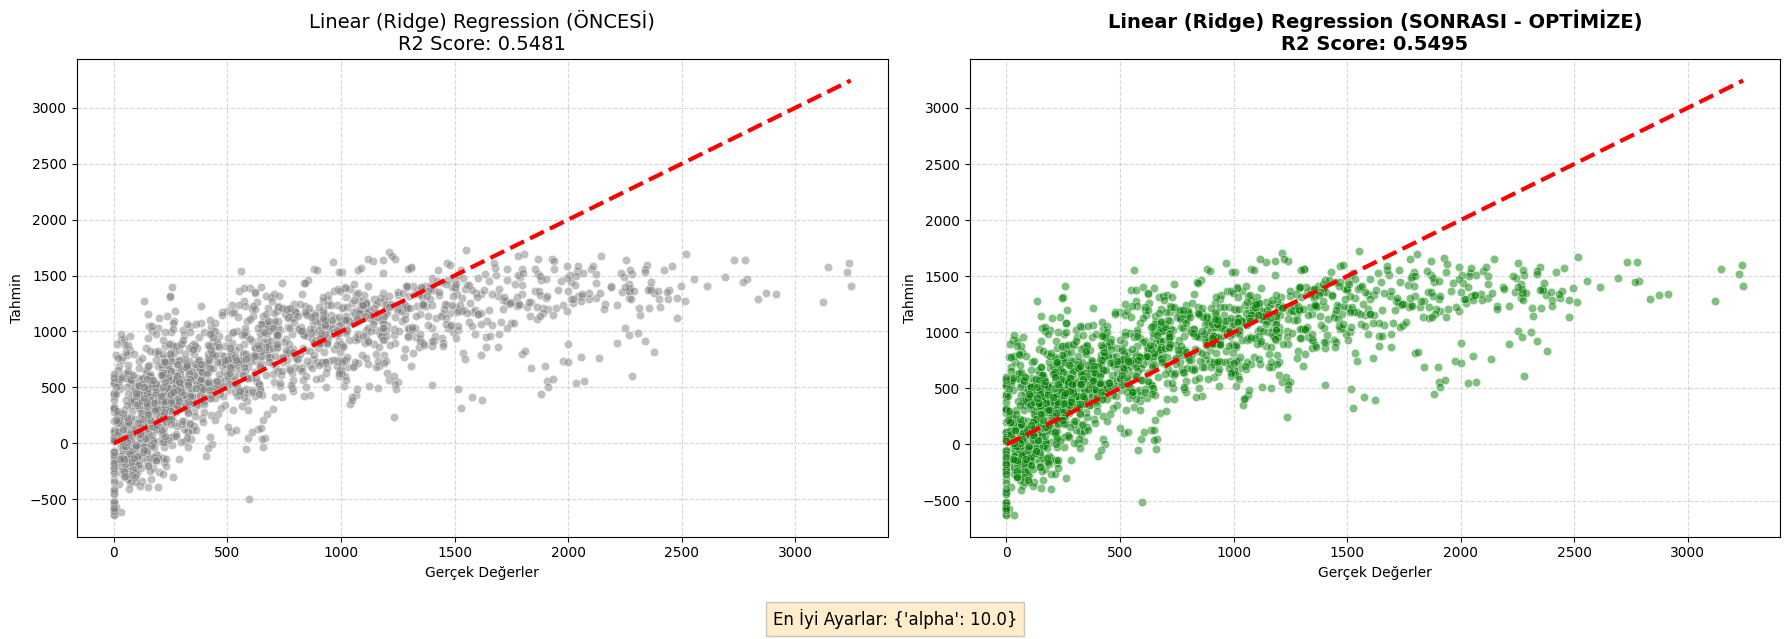


2/3: Random Forest optimize ediliyor (Biraz zaman alabilir)...


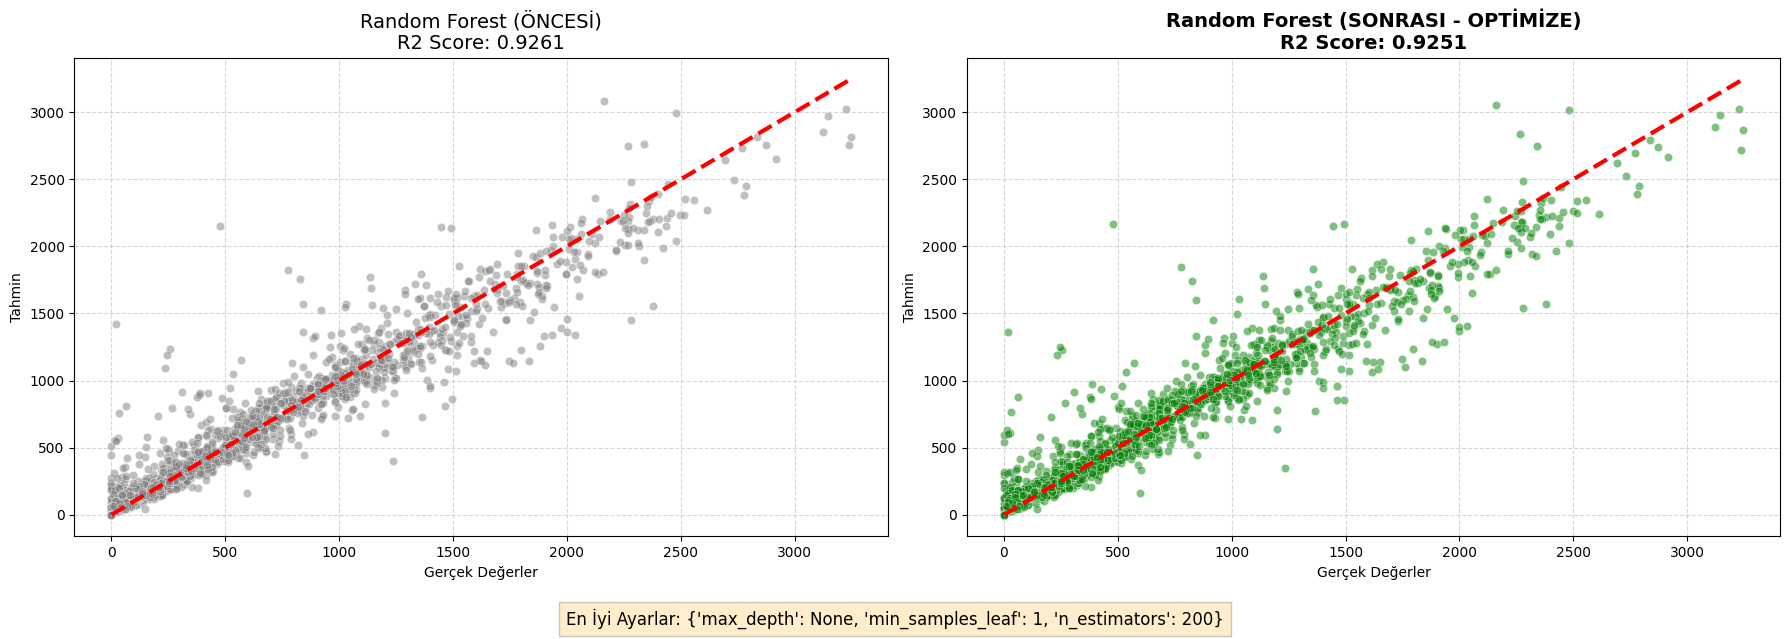


3/3: XGBoost optimize ediliyor...


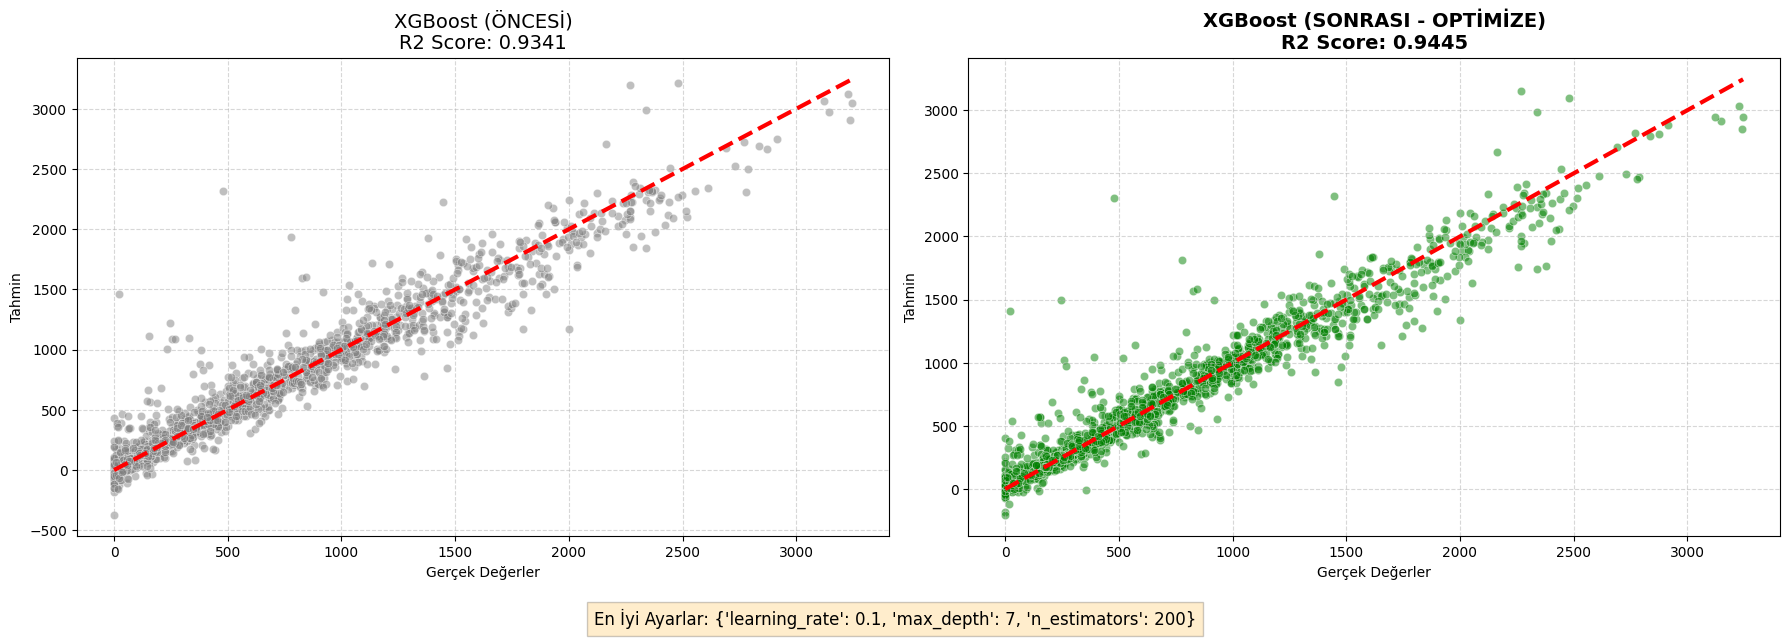

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grafik Çizdirme Fonksiyonu (Tekrar tekrar yazmamak için)
def visualize_optimization(model_name, y_true, y_pred_before, y_pred_after, r2_before, r2_after, best_params):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # 1. Grafik: Optimizasyon ÖNCESİ
    sns.scatterplot(x=y_true, y=y_pred_before, ax=axes[0], color='gray', alpha=0.5)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3)
    axes[0].set_title(f"{model_name} (ÖNCESİ)\nR2 Score: {r2_before:.4f}", fontsize=14)
    axes[0].set_xlabel("Gerçek Değerler")
    axes[0].set_ylabel("Tahmin")
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # 2. Grafik: Optimizasyon SONRASI
    sns.scatterplot(x=y_true, y=y_pred_after, ax=axes[1], color='green', alpha=0.5)
    axes[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3)
    axes[1].set_title(f"{model_name} (SONRASI - OPTİMİZE)\nR2 Score: {r2_after:.4f}", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Gerçek Değerler")
    axes[1].set_ylabel("Tahmin")
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # Parametreleri Altına Yaz
    plt.figtext(0.5, -0.05, f"En İyi Ayarlar: {best_params}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    plt.tight_layout()
    plt.show()

# =============================================================================
# 1. LINEAR REGRESSION (Optimize hali: RIDGE REGRESSION)
# =============================================================================
print("1/3: Linear Regression optimize ediliyor (Ridge ile)...")

# A) Öncesi (Standart Linear)
lr_base = LinearRegression()
lr_base.fit(X_train_scaled, y_train)
y_pred_lr_base = lr_base.predict(X_val_scaled)
r2_lr_base = r2_score(y_val, y_pred_lr_base)

# B) Optimizasyon (Ridge - Alpha parametresi aranacak)
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_lr = GridSearchCV(Ridge(), ridge_params, cv=3, scoring='r2')
grid_lr.fit(X_train_scaled, y_train)

# C) Sonrası
best_lr = grid_lr.best_estimator_
y_pred_lr_opt = best_lr.predict(X_val_scaled)
r2_lr_opt = r2_score(y_val, y_pred_lr_opt)

# Görselleştir
visualize_optimization("Linear (Ridge) Regression", y_val, y_pred_lr_base, y_pred_lr_opt, r2_lr_base, r2_lr_opt, grid_lr.best_params_)


# =============================================================================
# 2. RANDOM FOREST
# =============================================================================
print("\n2/3: Random Forest optimize ediliyor (Biraz zaman alabilir)...")

# A) Öncesi (Varsayılan Ayarlar)
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_rf_base = rf_base.predict(X_val_scaled)
r2_rf_base = r2_score(y_val, y_pred_rf_base)

# B) Optimizasyon (Grid Search)
# Not: Hızlı bitmesi için parametre aralığını dar tuttum.
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# C) Sonrası
best_rf = grid_rf.best_estimator_
y_pred_rf_opt = best_rf.predict(X_val_scaled)
r2_rf_opt = r2_score(y_val, y_pred_rf_opt)

# Görselleştir
visualize_optimization("Random Forest", y_val, y_pred_rf_base, y_pred_rf_opt, r2_rf_base, r2_rf_opt, grid_rf.best_params_)


# =============================================================================
# 3. XGBOOST
# =============================================================================
print("\n3/3: XGBoost optimize ediliyor...")

# A) Öncesi (Varsayılan Ayarlar)
xgb_base = XGBRegressor(random_state=42)
xgb_base.fit(X_train_scaled, y_train)
y_pred_xgb_base = xgb_base.predict(X_val_scaled)
r2_xgb_base = r2_score(y_val, y_pred_xgb_base)

# B) Optimizasyon (Grid Search)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

# C) Sonrası
best_xgb = grid_xgb.best_estimator_
y_pred_xgb_opt = best_xgb.predict(X_val_scaled)
r2_xgb_opt = r2_score(y_val, y_pred_xgb_opt)

# Görselleştir
visualize_optimization("XGBoost", y_val, y_pred_xgb_base, y_pred_xgb_opt, r2_xgb_base, r2_xgb_opt, grid_xgb.best_params_)

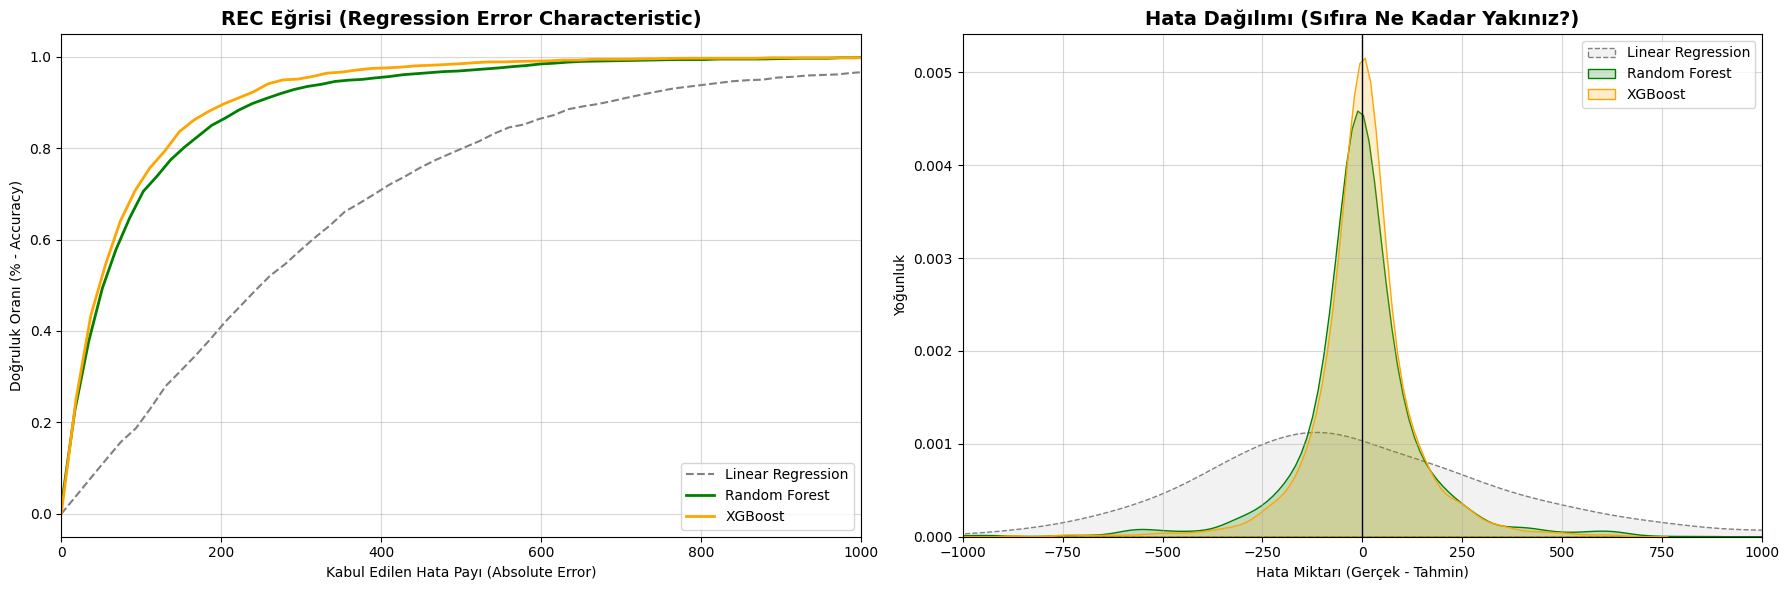

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# REC Eğrisi Hesaplama Fonksiyonu
def get_rec_curve(y_true, y_pred):
    # Hataların mutlak değerini al
    errors = np.abs(y_true - y_pred)
    # Tolerans aralığı (0'dan hataların maksimumuna kadar)
    tolerances = np.linspace(0, np.max(errors), 100)
    accuracy = []

    # Her tolerans değeri için başarı oranını hesapla
    for t in tolerances:
        # Hata bu toleransın altındaysa "Doğru" kabul et
        acc = np.mean(errors <= t)
        accuracy.append(acc)

    return tolerances, accuracy

# Modellerin Tahminlerini Alalım (Optimize veya Base modelleri kullanabilirsin)
# Not: Elindeki en son eğitilmiş model isimlerini buraya yazmalısın
y_pred_lr = best_lr.predict(X_val_scaled)  # veya lr_model
y_pred_rf = best_rf.predict(X_val_scaled)  # veya rf_model
y_pred_xgb = best_xgb.predict(X_val_scaled) # veya xgb_model

# Grafik Ayarları
plt.figure(figsize=(18, 6))

# --- GRAFİK 1: REC Eğrisi (ROC'un Regresyon Hali) ---
plt.subplot(1, 2, 1)

# Linear Regression
tol_lr, acc_lr = get_rec_curve(y_val, y_pred_lr)
plt.plot(tol_lr, acc_lr, label='Linear Regression', color='gray', linestyle='--')

# Random Forest
tol_rf, acc_rf = get_rec_curve(y_val, y_pred_rf)
plt.plot(tol_rf, acc_rf, label='Random Forest', color='green', linewidth=2)

# XGBoost
tol_xgb, acc_xgb = get_rec_curve(y_val, y_pred_xgb)
plt.plot(tol_xgb, acc_xgb, label='XGBoost', color='orange', linewidth=2)

plt.title('REC Eğrisi (Regression Error Characteristic)', fontsize=14, fontweight='bold')
plt.xlabel('Kabul Edilen Hata Payı (Absolute Error)')
plt.ylabel('Doğruluk Oranı (% - Accuracy)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlim(0, 1000) # Grafiği odaklamak için X eksenini sınırlandırdık (Gerekirse artır)

# --- GRAFİK 2: Hata Dağılımı (Residual Distribution) ---
plt.subplot(1, 2, 2)

# Hataları Hesapla (Gerçek - Tahmin)
residuals_lr = y_val - y_pred_lr
residuals_rf = y_val - y_pred_rf
residuals_xgb = y_val - y_pred_xgb

# Yoğunluk Grafiği (KDE Plot)
sns.kdeplot(residuals_lr, label='Linear Regression', color='gray', linestyle='--', fill=True, alpha=0.1)
sns.kdeplot(residuals_rf, label='Random Forest', color='green', fill=True, alpha=0.2)
sns.kdeplot(residuals_xgb, label='XGBoost', color='orange', fill=True, alpha=0.2)

plt.title('Hata Dağılımı (Sıfıra Ne Kadar Yakınız?)', fontsize=14, fontweight='bold')
plt.xlabel('Hata Miktarı (Gerçek - Tahmin)')
plt.ylabel('Yoğunluk')
plt.axvline(0, color='black', linestyle='-', linewidth=1) # Mükemmel nokta
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlim(-1000, 1000) # Odaklanmak için sınır

plt.tight_layout()
plt.show()

Veriler birleştiriliyor (Train + Val)...
Yeni Eğitim Seti Boyutu: (7008, 17)
Final Test Seti Boyutu : (1752, 17) (Buna dokunmadık!)

Final Model (XGBRegressor) tüm veriyle eğitiliyor...
Final Sınavı Yapılıyor (Test Seti Tahmini)...

🎉 PROJE FİNAL SONUCU (TEST SETİ)
Final R2 Score : 0.9427
Final MAE      : 87.66
Final RMSE     : 154.53


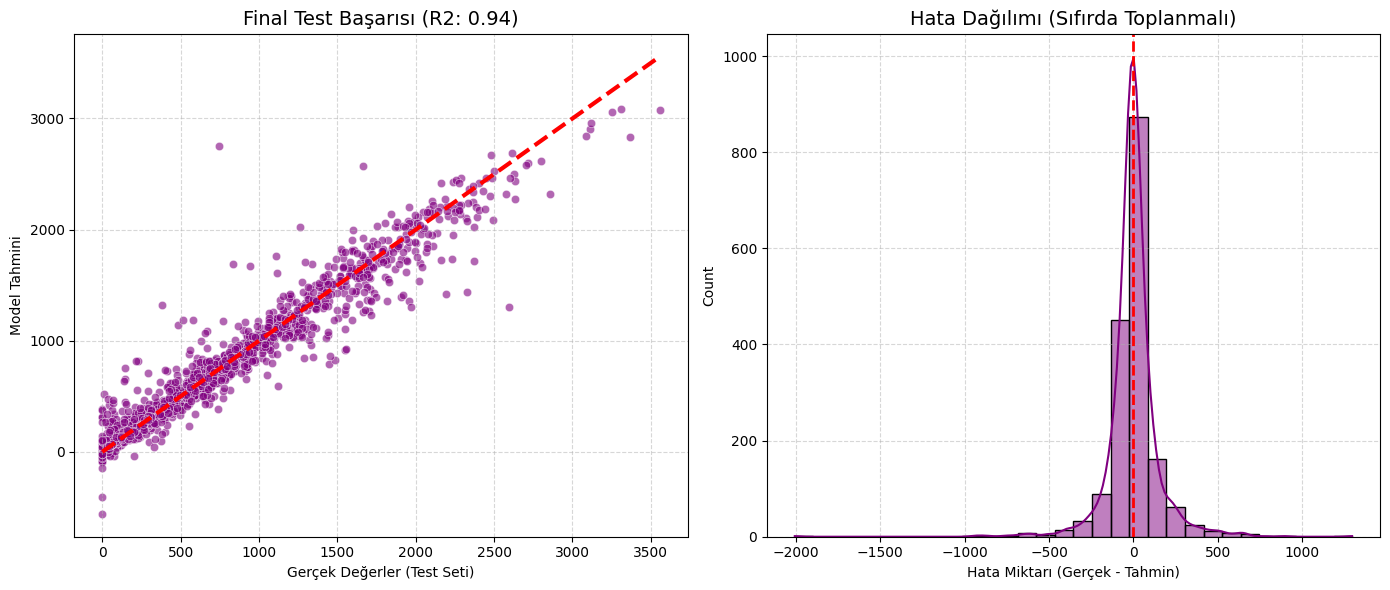

In [ ]:
!pip install shap

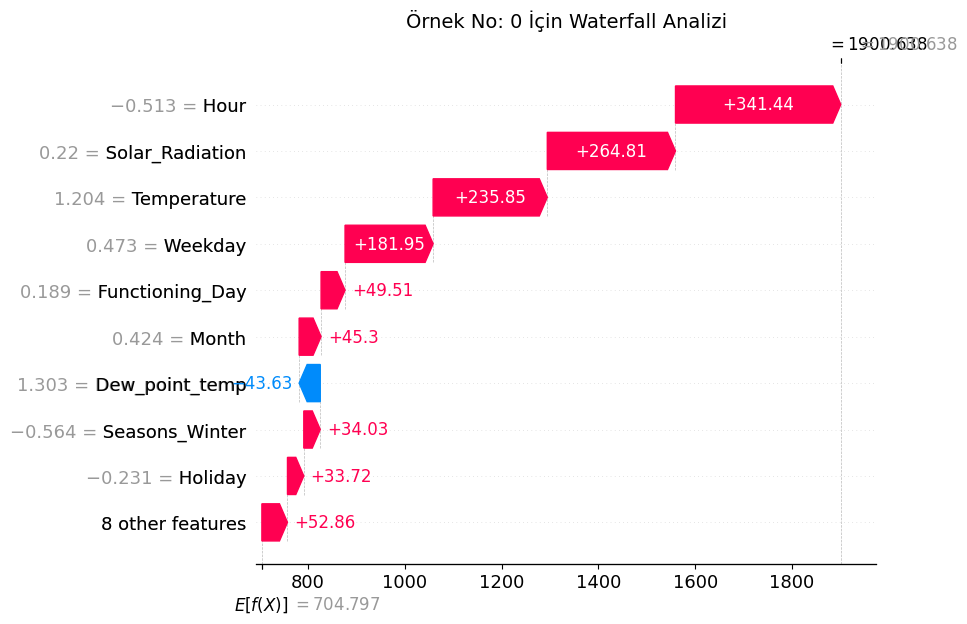


Örnek 0 için Force Plot (Kırmızı: Artırıcı, Mavi: Azaltıcı):


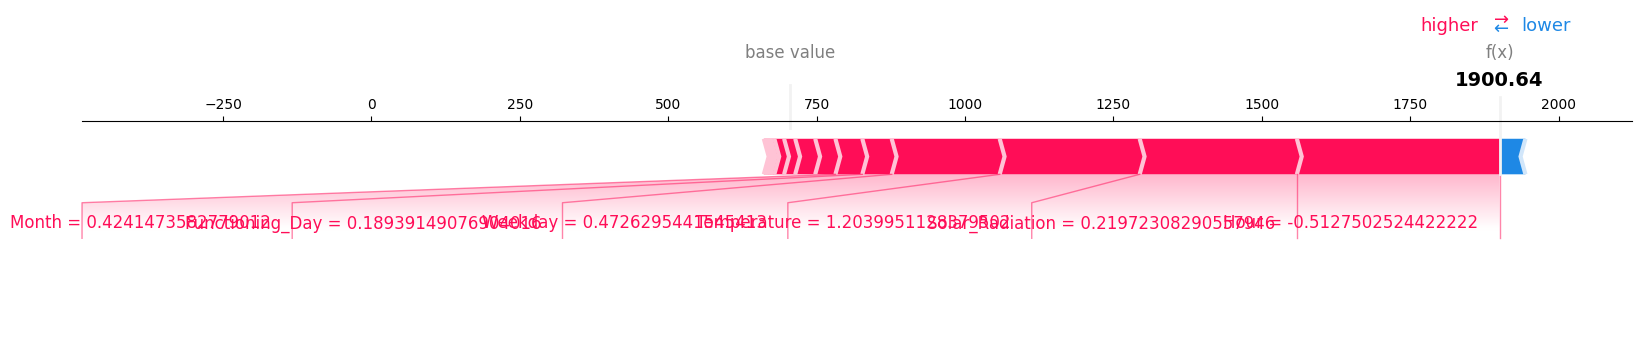


İlk 100 Veri İçin İnteraktif Force Plot:


In [ ]:
import shap
import matplotlib.pyplot as plt

# Javascript görselleştirmelerini başlat (Force plot için şart)
shap.initjs()

# 1. EXPLAINER NESNESİNİ OLUŞTUR
# (Eğer önceki adımda oluşturduysan tekrar etmene gerek yok ama garanti olsun)
explainer = shap.TreeExplainer(final_model)

# 2. SHAP DEĞERLERİNİ NESNE OLARAK HESAPLA
# Not: Waterfall grafiği için .shap_values() yerine explainer(X) kullanmak daha iyidir.
# Bu işlem tüm test seti için biraz zaman alabilir, o yüzden sadece ilk 100 veriyi alalım.
explanation = explainer(X_test_scaled.iloc[:100])

# ---------------------------------------------------------
# A) WATERFALL PLOT (Tek Bir Tahminin Hikayesi)
# ---------------------------------------------------------
# Test setindeki 0. indeksli (ilk) veriyi inceleyelim
ornek_no = 0

plt.figure(figsize=(10, 6))
# max_display=10: En önemli 10 özelliği göster
shap.plots.waterfall(explanation[ornek_no], max_display=10, show=False)
plt.title(f"Örnek No: {ornek_no} İçin Waterfall Analizi", fontsize=14)
plt.show()

# ---------------------------------------------------------
# B) FORCE PLOT (Halat Çekme Yarışı - Tekli)
# ---------------------------------------------------------
# Aynı örnek için kuvvet grafiği
print(f"\nÖrnek {ornek_no} için Force Plot (Kırmızı: Artırıcı, Mavi: Azaltıcı):")
shap.plots.force(explanation[ornek_no], matplotlib=True) # Matplotlib=True statik resim yapar

# ---------------------------------------------------------
# C) FORCE PLOT (İnteraktif - Çoklu)
# ---------------------------------------------------------
# İlk 100 veriyi yan yatırıp birleştirince oluşan nehir grafiği
# Bu grafik mouse ile üzerine gelince etkileşimli çalışır (Notebook'ta)
print("\nİlk 100 Veri İçin İnteraktif Force Plot:")
shap.force_plot(explainer.expected_value, explanation.values[:100], X_test_scaled.iloc[:100])

SHAP değerleri hesaplanıyor... (Biraz zaman alabilir)


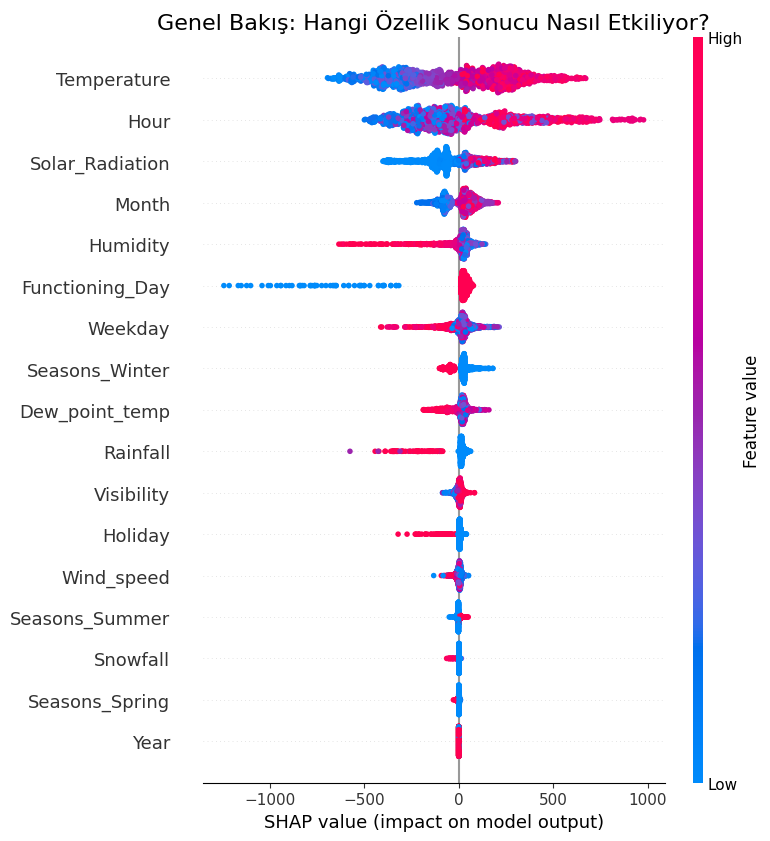

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Explainer'ı Tanımla (Ağaç tabanlı modeller için TreeExplainer kullanılır)
# final_model: Senin eğittiğin en son model (best_xgb veya best_rf)
explainer = shap.TreeExplainer(final_model)

# 2. SHAP Değerlerini Hesapla (Test seti üzerinde)
print("SHAP değerleri hesaplanıyor... (Biraz zaman alabilir)")
shap_values = explainer.shap_values(X_test_scaled)

# 3. Grafiği Çiz (Beeswarm Plot)
plt.figure(figsize=(12, 10)) # Grafiğin boyutunu ayarlıyoruz

# show=False diyoruz ki üzerine başlık ekleyebilelim
shap.summary_plot(shap_values, X_test_scaled, show=False)

# Başlığı ekle (Senin görselindeki gibi)
plt.title("Genel Bakış: Hangi Özellik Sonucu Nasıl Etkiliyor?", fontsize=16)
plt.show()

Model Adı            | Süre (Saniye)  
----------------------------------------
Linear Regression    | 0.0115 sn
Random Forest        | 12.7995 sn
XGBoost              | 0.4856 sn


/tmp/ipython-input-3360524908.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Time", data=df_timing, palette="rocket")


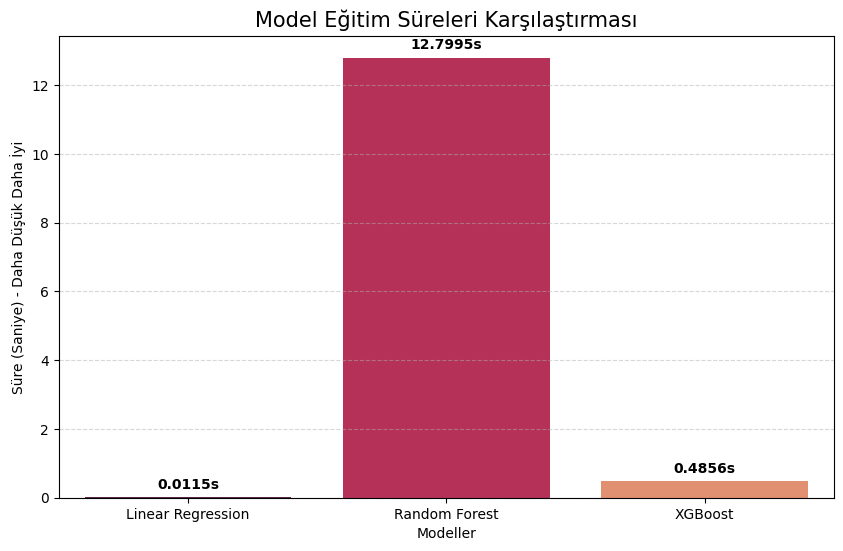

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 1. Modelleri Hazırla
# (Adil olması için benzer parametrelerle sıfırdan tanımlıyoruz)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
}

# Süreleri tutacağımız liste
timing_results = []

print(f"{'Model Adı':<20} | {'Süre (Saniye)':<15}")
print("-" * 40)

# 2. Döngü ile Her Modeli Eğit ve Süreyi Ölç
for name, model in models.items():
    start_time = time.time()  # Kronometreyi Başlat

    model.fit(X_train_scaled, y_train)  # Eğitimi Yap

    end_time = time.time()    # Kronometreyi Durdur

    duration = end_time - start_time
    timing_results.append({"Model": name, "Time": duration})

    print(f"{name:<20} | {duration:.4f} sn")

# 3. Sonuçları Görselleştir
df_timing = pd.DataFrame(timing_results)

plt.figure(figsize=(10, 6))
# Logaritmik ölçek kullanmıyoruz çünkü farkı net görmek istiyoruz,
# ama fark çok uçuksa (biri 0.01 sn, diğeri 10 sn) grafik tuhaf durabilir.
ax = sns.barplot(x="Model", y="Time", data=df_timing, palette="rocket")

# Çubukların üzerine süreleri yazalım
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}s',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontweight='bold')

plt.title("Model Eğitim Süreleri Karşılaştırması", fontsize=15)
plt.ylabel("Süre (Saniye) - Daha Düşük Daha İyi")
plt.xlabel("Modeller")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()